In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user=pd.read_csv('takehome_users.csv', encoding='latin-1')


In [3]:
user

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
user['last_session_creation_time'].fillna(user['last_session_creation_time'].mean(), inplace=True)

In [6]:
user['invited_by_user_id'].fillna(-1, inplace=True)
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
user['creation_time']=pd.to_datetime(user['creation_time'])

In [8]:
user.rename(columns={'object_id': 'user_id'}, inplace=True)

In [9]:
user

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,-1.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,-1.0


In [10]:
summ = pd.read_csv('takehome_user_engagement.csv')
summ.set_index('time_stamp')
#summ.groupby('user_id')
summ

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [11]:
from datetime import timedelta
import pandas as pd

# Assuming summ is your DataFrame with 'user_id', 'time_stamp', and 'visited' columns

# Convert 'time_stamp' to datetime format
summ['time_stamp'] = pd.to_datetime(summ['time_stamp'])

# Sort the DataFrame by 'user_id' and 'time_stamp'
summ_sorted = summ.sort_values(['user_id', 'time_stamp'], ignore_index=True)

# Calculate time differences between consecutive logins for each user
summ_sorted['time_diff'] = summ_sorted.groupby('user_id')['time_stamp'].diff()

# Ensure 'time_diff' contains only numeric values (total seconds)
summ_sorted['time_diff'] = summ_sorted['time_diff'].dt.total_seconds()

# Identify adopted users based on the updated criteria
summ_sorted['adopted_user'] = summ_sorted.groupby('user_id')['time_diff'].apply(
    lambda group: any(group.rolling(window=3, min_periods=1).sum() <= 7*24*3600)  # 7 days in seconds
).reset_index(level=0, drop=True)

# Print the DataFrame to check the 'adopted_user' column
print(summ_sorted[['user_id', 'time_stamp', 'visited', 'time_diff', 'adopted_user']])

        user_id          time_stamp  visited  time_diff adopted_user
0             1 2014-04-22 03:53:30        1        NaN        False
1             2 2013-11-15 03:45:04        1        NaN        False
2             2 2013-11-29 03:45:04        1  1209600.0        False
3             2 2013-12-09 03:45:04        1   864000.0        False
4             2 2013-12-25 03:45:04        1  1382400.0        False
...         ...                 ...      ...        ...          ...
207912    11996 2013-09-06 06:14:15        1        NaN          NaN
207913    11997 2013-01-15 18:28:37        1        NaN          NaN
207914    11998 2014-04-27 12:45:16        1        NaN          NaN
207915    11999 2012-06-02 11:55:59        1        NaN          NaN
207916    12000 2014-01-26 08:57:12        1        NaN          NaN

[207917 rows x 5 columns]


/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_40278/1154354157.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(summ_sorted[['user_id', 'time_stamp', 'visited', 'time_diff', 'adopted_user']])


In [12]:
summ_sorted

/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/IPython/core/formatters.py:345: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,time_stamp,user_id,visited,time_diff,adopted_user
0,2014-04-22 03:53:30,1,1,NaN,False
1,2013-11-15 03:45:04,2,1,NaN,False
2,2013-11-29 03:45:04,2,1,1209600.0,False
3,2013-12-09 03:45:04,2,1,864000.0,False
4,2013-12-25 03:45:04,2,1,1382400.0,False
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,NaN,NaN
207913,2013-01-15 18:28:37,11997,1,NaN,NaN
207914,2014-04-27 12:45:16,11998,1,NaN,NaN
207915,2012-06-02 11:55:59,11999,1,NaN,NaN


In [13]:
summ_sorted['adopted_user'].value_counts()

False    7011
True     1812
Name: adopted_user, dtype: int64

In [14]:
summ['time_stamp'] = pd.to_datetime(summ['time_stamp'])

# Sort the DataFrame by 'user_id' and 'time_stamp'
summ_sorted = summ.sort_values(['user_id', 'time_stamp'], ignore_index=True)

# Calculate time differences between consecutive logins for each user
summ_sorted['time_diff'] = summ_sorted.groupby('user_id')['time_stamp'].diff()

# Ensure 'time_diff' contains only numeric values (total seconds)
summ_sorted['time_diff'] = summ_sorted['time_diff'].dt.total_seconds()

# Identify adopted users based on the updated criteria
adopted_users = summ_sorted.groupby('user_id')['time_diff'].apply(
    lambda group: any(group.rolling(window=3, min_periods=1).sum() <= 7*24*3600)  # 7 days in seconds
).reset_index()

# Rename the columns
adopted_users.columns = ['user_id', 'adopted_user']

# Print the DataFrame with one row per user indicating whether they are adopted or not
print(adopted_users)

      user_id  adopted_user
0           1         False
1           2         False
2           3         False
3           4         False
4           5         False
...       ...           ...
8818    11996         False
8819    11997         False
8820    11998         False
8821    11999         False
8822    12000         False

[8823 rows x 2 columns]


In [15]:
adopted_users

,user_id,adopted_user
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
...,...,...
8818,11996,False
8819,11997,False
8820,11998,False
8821,11999,False


In [16]:
adopted_users['adopted_user'].value_counts()

False    7011
True     1812
Name: adopted_user, dtype: int64

In [17]:
data_all_users = {'user_id': range(0, 12000)}
df_users = pd.DataFrame(data_all_users)

# Assuming adopted_users is the DataFrame with 'user_id' and 'adopted_user' columns
# Make sure 'adopted_user' column is boolean (True, False)
adopted_users['adopted_user'] = adopted_users['adopted_user'].astype(bool)

# Merge df_users and adopted_users based on 'user_id'
df_merged = pd.merge(df_users, adopted_users, on='user_id', how='left')

# Fill NaN values in 'adopted_user' column with False
df_merged['adopted_user'].fillna(False, inplace=True)

# Now df_merged contains 'user_id' and 'adopted_user' columns
# Print the counts of True and False in 'adopted_user'
print(df_merged['adopted_user'].value_counts())

False    10188
True      1812
Name: adopted_user, dtype: int64


In [18]:
df_merged

,user_id,adopted_user
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
11995,11995,False
11996,11996,False
11997,11997,False
11998,11998,False


In [19]:
print(df_merged['adopted_user'].unique())
print(df_merged['adopted_user'].value_counts())

[False  True]
False    10188
True      1812
Name: adopted_user, dtype: int64


In [20]:
df_merged['adopted_user'] = df_merged['adopted_user'].astype(int)
df_merged

,user_id,adopted_user
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
11995,11995,0
11996,11996,0
11997,11997,0
11998,11998,0


In [21]:
print(df_merged['adopted_user'].unique())
print(df_merged['adopted_user'].value_counts())

[0 1]
0    10188
1     1812
Name: adopted_user, dtype: int64


In [22]:
df = pd.merge(user, df_merged, on='user_id', how='left')
df['adopted_user'].fillna(0, inplace=True)

In [23]:
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,-1.0,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,-1.0,0.0


In [24]:
print(df['adopted_user'].unique())
print(df['adopted_user'].value_counts())

[0. 1.]
0.0    10188
1.0     1812
Name: adopted_user, dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  adopted_user                12000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['name'] = label_encoder.fit_transform(df['name'])
df['email'] = label_encoder.fit_transform(df['email'])

In [27]:
df = pd.get_dummies(df, columns=['creation_source'], prefix='source')

In [28]:
df

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,2087,1047,1.398139e+09,1,0,11,10803.0,0.0,1,0,0,0,0
1,2,2013-11-15 03:45:04,8488,7290,1.396238e+09,0,0,1,316.0,0.0,0,1,0,0,0
2,3,2013-03-19 23:14:52,1259,7681,1.363735e+09,0,0,94,1525.0,0.0,0,1,0,0,0
3,4,2013-05-21 08:09:28,2099,7971,1.369210e+09,0,0,1,5151.0,0.0,1,0,0,0,0
4,5,2013-01-17 10:14:20,8708,3718,1.358850e+09,0,0,193,5240.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,7156,9573,1.378448e+09,0,0,89,8263.0,0.0,0,1,0,0,0
11996,11997,2013-01-10 18:28:37,3521,535,1.358275e+09,0,0,200,-1.0,0.0,0,0,0,0,1
11997,11998,2014-04-27 12:45:16,4598,4322,1.398603e+09,1,1,83,8074.0,0.0,1,0,0,0,0
11998,11999,2012-05-31 11:55:59,3261,11341,1.338638e+09,0,0,6,-1.0,0.0,0,0,1,0,0


Now lets convert creation_time and last_session_creation_time both in the same format.

In [29]:
df['last_session_creation_time'] = pd.to_datetime(df['last_session_creation_time'], unit='s')

df['creation_time'] = pd.to_datetime(df['creation_time'])

df['account_age_days'] = (df['last_session_creation_time'] - df['creation_time']).dt.days

#Drop the original timestamp columns if not needed
#df.drop(['creation_time', 'last_session_creation_time'], axis=1, inplace=True)
df

,user_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,account_age_days
0,1,2014-04-22 03:53:30,2087,1047,2014-04-22 03:53:30,1,0,11,10803.0,0.0,1,0,0,0,0,0
1,2,2013-11-15 03:45:04,8488,7290,2014-03-31 03:45:04,0,0,1,316.0,0.0,0,1,0,0,0,136
2,3,2013-03-19 23:14:52,1259,7681,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,1,0,0,0,0
3,4,2013-05-21 08:09:28,2099,7971,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1,0,0,0,0,1
4,5,2013-01-17 10:14:20,8708,3718,2013-01-22 10:14:20,0,0,193,5240.0,0.0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,7156,9573,2013-09-06 06:14:15,0,0,89,8263.0,0.0,0,1,0,0,0,0
11996,11997,2013-01-10 18:28:37,3521,535,2013-01-15 18:28:37,0,0,200,-1.0,0.0,0,0,0,0,1,5
11997,11998,2014-04-27 12:45:16,4598,4322,2014-04-27 12:45:16,1,1,83,8074.0,0.0,1,0,0,0,0,0
11998,11999,2012-05-31 11:55:59,3261,11341,2012-06-02 11:55:59,0,0,6,-1.0,0.0,0,0,1,0,0,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  int64         
 3   email                       12000 non-null  int64         
 4   last_session_creation_time  12000 non-null  datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   adopted_user                12000 non-null  float64       
 10  source_GUEST_INVITE         12000 non-null  uint8         
 11  source_ORG_INVITE           12000 non-null  uint8     

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'creation_time'}>,
        <Axes: title={'center': 'name'}>,
        <Axes: title={'center': 'email'}>],
       [<Axes: title={'center': 'last_session_creation_time'}>,
        <Axes: title={'center': 'opted_in_to_mailing_list'}>,
        <Axes: title={'center': 'enabled_for_marketing_drip'}>,
        <Axes: title={'center': 'org_id'}>],
       [<Axes: title={'center': 'invited_by_user_id'}>,
        <Axes: title={'center': 'adopted_user'}>,
        <Axes: title={'center': 'source_GUEST_INVITE'}>,
        <Axes: title={'center': 'source_ORG_INVITE'}>],
       [<Axes: title={'center': 'source_PERSONAL_PROJECTS'}>,
        <Axes: title={'center': 'source_SIGNUP'}>,
        <Axes: title={'center': 'source_SIGNUP_GOOGLE_AUTH'}>,
        <Axes: title={'center': 'account_age_days'}>]], dtype=object)

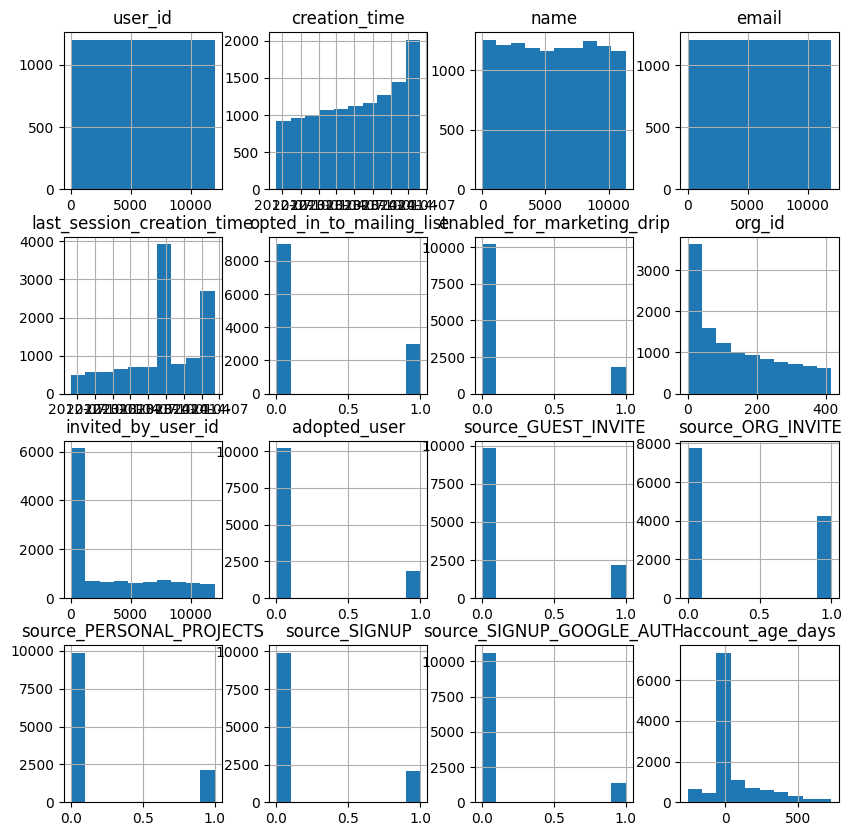

In [41]:
df.hist(figsize=(10,10))

## Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [32]:
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

X['creation_time'] = pd.to_datetime(X['creation_time'])
X['last_session_creation_time'] = pd.to_datetime(X['last_session_creation_time'])

# Extract year, month, and day
X['creation_year'] = X['creation_time'].dt.year
X['creation_month'] = X['creation_time'].dt.month
X['creation_day'] = X['creation_time'].dt.day
X['last_session_creation_year'] = X['last_session_creation_time'].dt.year
X['last_session_creation_month'] = X['last_session_creation_time'].dt.month
X['last_session_creation_day'] = X['last_session_creation_time'].dt.day

# Drop the original 'creation_time' and 'last_session_creation_time' columns or any other non-numeric columns
X = X.drop(['creation_time', 'last_session_creation_time'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
X

,user_id,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,source_GUEST_INVITE,source_ORG_INVITE,source_PERSONAL_PROJECTS,source_SIGNUP,source_SIGNUP_GOOGLE_AUTH,account_age_days,creation_year,creation_month,creation_day,last_session_creation_year,last_session_creation_month,last_session_creation_day
0,1,2087,1047,1,0,11,10803.0,1,0,0,0,0,0,2014,4,22,2014,4,22
1,2,8488,7290,0,0,1,316.0,0,1,0,0,0,136,2013,11,15,2014,3,31
2,3,1259,7681,0,0,94,1525.0,0,1,0,0,0,0,2013,3,19,2013,3,19
3,4,2099,7971,0,0,1,5151.0,1,0,0,0,0,1,2013,5,21,2013,5,22
4,5,8708,3718,0,0,193,5240.0,1,0,0,0,0,5,2013,1,17,2013,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,7156,9573,0,0,89,8263.0,0,1,0,0,0,0,2013,9,6,2013,9,6
11996,11997,3521,535,0,0,200,-1.0,0,0,0,0,1,5,2013,1,10,2013,1,15
11997,11998,4598,4322,1,1,83,8074.0,1,0,0,0,0,0,2014,4,27,2014,4,27
11998,11999,3261,11341,0,0,6,-1.0,0,0,1,0,0,2,2012,5,31,2012,6,2


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      12000 non-null  int64  
 1   name                         12000 non-null  int64  
 2   email                        12000 non-null  int64  
 3   opted_in_to_mailing_list     12000 non-null  int64  
 4   enabled_for_marketing_drip   12000 non-null  int64  
 5   org_id                       12000 non-null  int64  
 6   invited_by_user_id           12000 non-null  float64
 7   source_GUEST_INVITE          12000 non-null  uint8  
 8   source_ORG_INVITE            12000 non-null  uint8  
 9   source_PERSONAL_PROJECTS     12000 non-null  uint8  
 10  source_SIGNUP                12000 non-null  uint8  
 11  source_SIGNUP_GOOGLE_AUTH    12000 non-null  uint8  
 12  account_age_days             12000 non-null  int64  
 13  creation_year   

In [35]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred_lg= lg.predict(X_test)
acc_score_lg = accuracy_score(y_test, y_pred_lg)
print('acc_score_lg: ',acc_score_lg)
print("Classification Report lg:\n", classification_report(y_test, y_pred_lg))

acc_score_lg:  0.8870833333333333
Classification Report lg:
               precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2035
         1.0       0.74      0.39      0.52       365

    accuracy                           0.89      2400
   macro avg       0.82      0.68      0.73      2400
weighted avg       0.88      0.89      0.87      2400



/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  int64         
 3   email                       12000 non-null  int64         
 4   last_session_creation_time  12000 non-null  datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   adopted_user                12000 non-null  float64       
 10  source_GUEST_INVITE         12000 non-null  uint8         
 11  source_ORG_INVITE           12000 non-null  uint8     

### Try different models

Model: RandomForestClassifier
Accuracy: 0.9495833333333333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2035
         1.0       0.91      0.74      0.82       365

    accuracy                           0.95      2400
   macro avg       0.93      0.86      0.89      2400
weighted avg       0.95      0.95      0.95      2400

Model: LogisticRegression
Accuracy: 0.8870833333333333
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2035
         1.0       0.74      0.39      0.52       365

    accuracy                           0.89      2400
   macro avg       0.82      0.68      0.73      2400
weighted avg       0.88      0.89      0.87      2400



/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision

Model: SVC
Accuracy: 0.8479166666666667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      2035
         1.0       0.00      0.00      0.00       365

    accuracy                           0.85      2400
   macro avg       0.42      0.50      0.46      2400
weighted avg       0.72      0.85      0.78      2400



/Users/sabitabaral/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNeighborsClassifier
Accuracy: 0.8329166666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2035
         1.0       0.19      0.03      0.05       365

    accuracy                           0.83      2400
   macro avg       0.52      0.50      0.48      2400
weighted avg       0.75      0.83      0.78      2400

Model: SGDClassifier
Accuracy: 0.8716666666666667
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2035
         1.0       0.70      0.28      0.40       365

    accuracy                           0.87      2400
   macro avg       0.79      0.63      0.66      2400
weighted avg       0.85      0.87      0.85      2400



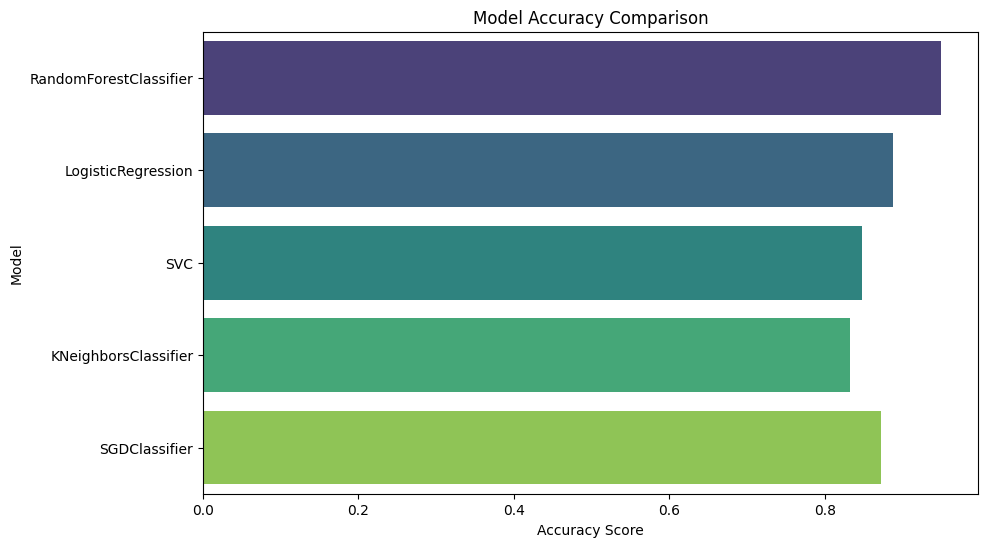

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are your feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to iterate through
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    SGDClassifier()
]

# Initialize lists to store model names and their corresponding accuracy scores
model_names = []
accuracy_scores = []

for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc_score}")
    print(f"Classification Report:\n{class_report}")
    print("="*50)

    # Store model name and accuracy score
    model_names.append(model.__class__.__name__)
    accuracy_scores.append(acc_score)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette="viridis")
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()

### Random Forest model stands out with accuracy score of 0.9491666666666667.
### Now, let's do hyperparameter tuning.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X and y are your feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test set using the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2035
         1.0       0.90      0.75      0.82       365

    accuracy                           0.95      2400
   macro avg       0.93      0.87      0.89      2400
weighted avg       0.95      0.95      0.95      2400

0.9495833333333333


#### The model acurracy increased from 0.9491666666666667 to 0.9495833333333333 after tuning the hyperparameters in this random forest model.

### Feature Importance Test

In [39]:
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
top_features = 10  # Change this to the number of top features you want to display
print(f'Top {top_features} Most Important Features:')
print(importances_df.head(top_features))

Top 10 Most Important Features:
                        Feature  Importance
12             account_age_days    0.365607
17  last_session_creation_month    0.158632
16   last_session_creation_year    0.126391
18    last_session_creation_day    0.084105
14               creation_month    0.059111
13                creation_year    0.046251
15                 creation_day    0.028815
5                        org_id    0.025068
0                       user_id    0.024196
1                          name    0.022717
